In [1]:
import numpy as np
import os
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# Number of classes to load from digits dataset
nn = 4

# Load the digits dataset with specified number of classes
digits = load_digits(n_class=nn)
X, y = digits.data, digits.target

# Number of instances per class
NN = 20
indices_to_keep = []

# Randomly sample NN instances from each class
for digit in np.unique(y):
    indices = np.where(y == digit)[0]
    sampled_indices = np.random.choice(indices, NN, replace=False)
    indices_to_keep.extend(sampled_indices)

# Subsample the dataset
X_reduced = X[indices_to_keep]
y_reduced = y[indices_to_keep]

# Data preprocessing using standard scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reduced)

# Dimensionality reduction using t-SNE
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_tsne, y_reduced, test_size=44, train_size=36, random_state=101)

# Save the dataset to .npz file format
# path = "data\digit_dataset.npz"
# np.savez(path, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

In [4]:
import numpy as np
import os
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# Number of classes and samples per class
nn = 3
NN = 20  # total samples per class

# Load the digits dataset with specified number of classes
digits = load_digits(n_class=nn)
X, y = digits.data, digits.target

indices_to_keep = []

# Randomly sample NN instances from each class
for digit in np.unique(y):
    indices = np.where(y == digit)[0]
    sampled_indices = np.random.choice(indices, NN, replace=False)
    indices_to_keep.extend(sampled_indices)

# Subsample the dataset
X_reduced = X[indices_to_keep]
y_reduced = y[indices_to_keep]

# Split each class into exactly 10 training and 10 testing samples
X_train, X_test, y_train, y_test = [], [], [], []

for digit in np.unique(y_reduced):
    class_indices = np.where(y_reduced == digit)[0]
    # Ensure deterministic splitting
    np.random.shuffle(class_indices)
    X_train.extend(X_reduced[class_indices[:10]])
    X_test.extend(X_reduced[class_indices[10:]])
    y_train.extend(y_reduced[class_indices[:10]])
    y_test.extend(y_reduced[class_indices[10:]])

# Convert lists to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Dimensionality reduction using t-SNE
tsne = TSNE(n_components=2, perplexity=20, learning_rate=200, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Data preprocessing using standard scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reduced)

# Data preprocessing using standard scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dimensionality reduction using t-SNE
tsne = TSNE(n_components=2, perplexity=20, learning_rate=200, random_state=42)
X_train = tsne.fit_transform(X_train_scaled)
X_test = tsne.fit_transform(X_test_scaled)

In [1]:
import numpy as np

def load_digits_dataset(file_path):
    """
    Load the training and testing dataset from a .npz file.

    Parameters:
    - file_path (str): The path to the .npz file containing the dataset.

    Returns:
    - X_train (numpy array): Training features.
    - X_test (numpy array): Testing features.
    - y_train (numpy array): Training labels.
    - y_test (numpy array): Testing labels.
    """
    data = np.load(file_path)
    X_train = data['X_train']
    X_test = data['X_test']
    y_train = data['y_train']
    y_test = data['y_test']
    return X_train, X_test, y_train, y_test

path = "data\digit_dataset.npz"
X_train, X_test, y_train, y_test = load_digits_dataset(path)


In [9]:
from qsvm import *

gamma = 0.05
params = {
    "data": X_train,
    "label": y_train,
    "B": 2,
    "K": 2,
    "Xi": 1,
    "gamma": gamma,
    "C": 1,
    "kernel": "rbf",
    "optimizer": "SA",
    "vis" : 0
}

# Initialize and train the classifier
sa_one_vs_rest = OneVsRestClassifier(class_num=nn, classifier=qSVM, params=params)
sa_one_vs_rest.solve(X_train, y_train)

# Evaluate the classifier
sa_accuracy = sa_one_vs_rest.evaluate(X_test, y_test)
print(f"Test Accuracy: {sa_accuracy*100:.2f}%")

Training classifier 0...
solving...
K,N 2 36
self.intercept -0.7393216963653653
Training classifier 1...
solving...
K,N 2 36
self.intercept -0.401612822132267
Training classifier 2...
solving...
K,N 2 36
self.intercept -0.24913133609197863
Training classifier 3...
solving...
K,N 2 36
self.intercept -0.37878147837688847
pred result [3 2 2 0 1 2 1 1 1 1 0 2 0 3 0 1 0 2 3 3 3 0 2 2 3 1 0 3 2 3 1 0 2 2 0 3 0
 2 3 2 2 0 1 1]
Test Accuracy: 86.36%


In [12]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

gamma = 0.005
# Initialize the classical SVM classifier
svm_classifier = SVC(kernel='rbf', gamma=gamma)

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Evaluate the classifier
svm_pred = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print(f"Classical SVM Test Accuracy: {svm_accuracy*100:.2f}%")

Classical SVM Test Accuracy: 86.36%


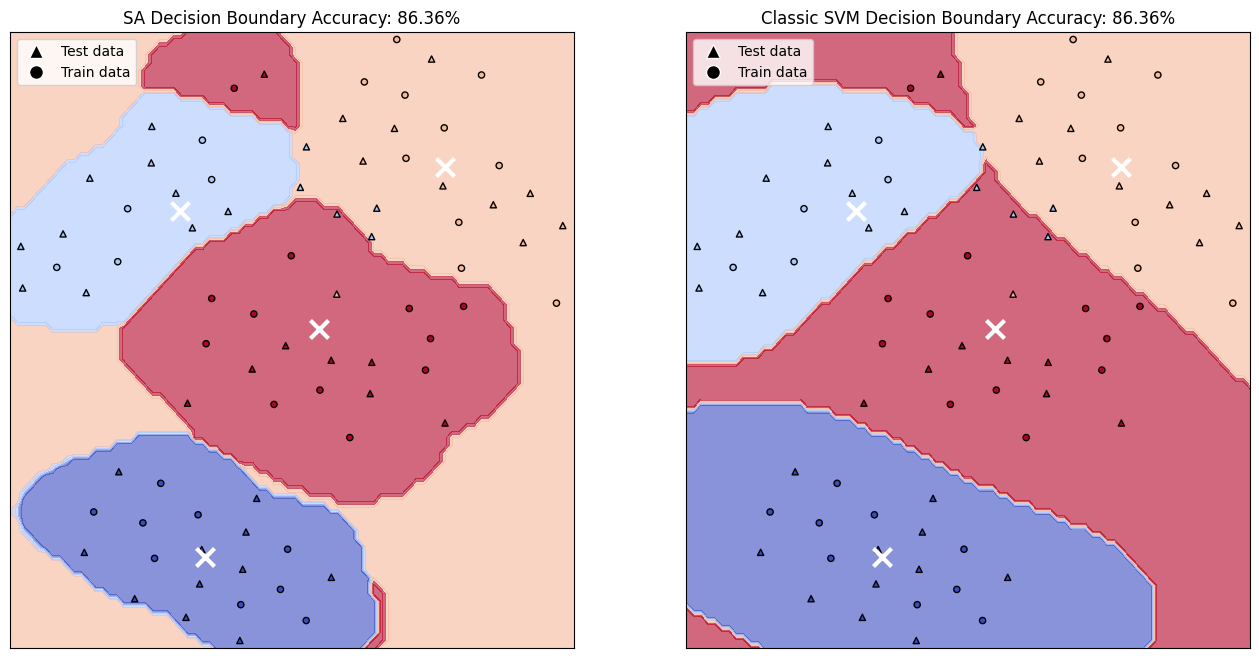

In [13]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def make_meshgrid(x, y, h=.2):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1    
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 80), np.linspace(y_min, y_max, 80))
    return xx, yy

# Function to plot decision boundaries
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# Set up plot figures
fig, sub = plt.subplots(1, 2,figsize=(16, 8))
# plt.subplots_adjust(wspace=0.05, hspace=0.4)

# Create meshgrid
X0, X1 = X_tsne[:, 0], X_tsne[:, 1]
xx, yy = make_meshgrid(X0, X1)

# Define colormap for plotting
coolwarm = plt.cm.coolwarm
colors = coolwarm(np.linspace(0, 1, nn))
cm = ListedColormap(colors)
# cm = plt.cm.coolwarm
# cm = plt.cm.Paired

# Plot decision boundaries and data points for qSVM
ax = sub[0]
contour = plot_contours(ax, sa_one_vs_rest, xx, yy, cmap=cm, alpha=0.6)
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm, marker='^', edgecolors='k', s=20)
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm, marker='o', edgecolors='k', s=20)

# Compute and plot centroids
centroids = np.array([X_tsne[y_reduced == i].mean(axis=0) for i in np.unique(y_reduced)])
ax.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=169, linewidths=3, color='w', zorder=10)

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(f"SA Decision Boundary Accuracy: {sa_accuracy*100:.2f}%")

# Add labels
labels = ['Test data', 'Train data']
handles = [plt.Line2D([0], [0], marker='^', color='white', markerfacecolor='k', markersize=10, linestyle=''),
           plt.Line2D([0], [0], marker='o', color='white', markerfacecolor='k', markersize=10, linestyle='')]
ax.legend(handles, labels)

# Plot decision boundaries and data points for classical SVM
ax = sub[1]
contour = plot_contours(ax, svm_classifier, xx, yy, cmap=cm, alpha=0.6)
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm, marker='^', edgecolors='k', s=20)
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm, marker='o', edgecolors='k', s=20)

# Compute and plot centroids
centroids = np.array([X_tsne[y_reduced == i].mean(axis=0) for i in np.unique(y_reduced)])
ax.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=169, linewidths=3, color='w', zorder=10)

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(f"Classic SVM Decision Boundary Accuracy: {svm_accuracy*100:.2f}%")

# Add labels
labels = ['Test data', 'Train data']
handles = [plt.Line2D([0], [0], marker='^', color='white', markerfacecolor='k', markersize=10, linestyle=''),
           plt.Line2D([0], [0], marker='o', color='white', markerfacecolor='k', markersize=10, linestyle='')]
ax.legend(handles, labels)

# Colorbar
# cbar = fig.colorbar(contour) #, ax=sub.ravel().tolist(), fraction=0.046, pad=0.04
# cbar.set_ticks(np.arange(0, nn))  # Setting ticks for nn classes
# cbar.set_ticklabels(np.arange(0, nn))  # Setting tick labels

plt.savefig("results\digit_0_3_SA_Classic.png",  bbox_inches='tight', dpi = 300)

plt.show()

Confusion matrix:
[[11  0  0  0]
 [ 0 10  2  3]
 [ 0  0  9  1]
 [ 0  0  0  8]]


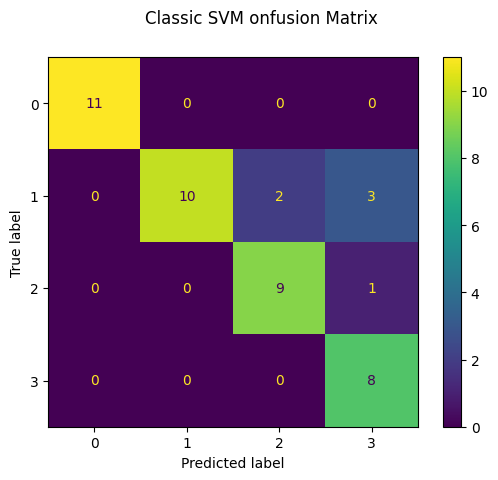

In [14]:
disp = ConfusionMatrixDisplay.from_predictions(y_test, svm_pred)
disp.figure_.suptitle("Classic SVM onfusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.savefig("results\digit_0_3_classic_confusion_matrix.png",  bbox_inches='tight', dpi = 300)

plt.show()

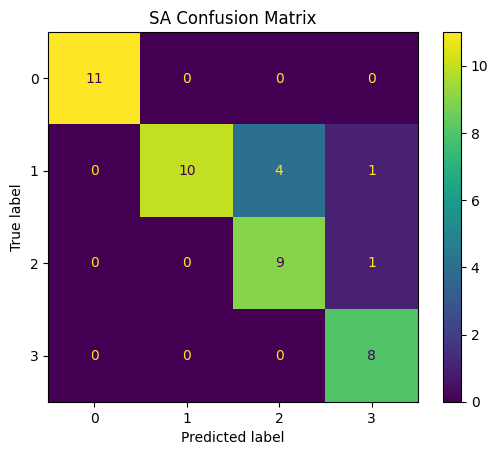

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# First, predict the test set labels
qsvm_predictions = sa_one_vs_rest.predict(X_test)

# Now, compute the confusion matrix using sklearn's functionality
cm = confusion_matrix(y_test, qsvm_predictions)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_reduced))
disp.plot(values_format='d')  # 'd' for integer formatting
plt.title("SA Confusion Matrix")

plt.savefig("results\digit_0_3_sa_confusion_matrix.png",  bbox_inches='tight', dpi = 300)

plt.show()

In [25]:
from qsvm import *

params = {
    "data": X_train,
    "label": y_train,
    "B": 2,
    "K": 2,
    "Xi": 1,
    "gamma": gamma,
    "C": 1,
    "kernel": "rbf",
    "optimizer": "QA",
    "vis" : 0
}

# Initialize and train the classifier
qa_OvR = OneVsRestClassifier(class_num=nn, classifier=qSVM, params=params)
qa_OvR.solve(X_train, y_train)

# Evaluate the classifier
qa_accuracy = qa_OvR.evaluate(X_test, y_test)
print(f"Test Accuracy: {qa_accuracy*100:.2f}%")

Training classifier 0...
solving...
K,N 2 36
self.intercept -0.6450714146204546
Training classifier 1...
solving...
K,N 2 36
self.intercept 0.11648618562912663
Training classifier 2...
solving...
K,N 2 36
self.intercept -0.14648838098472422
Training classifier 3...
solving...
K,N 2 36
self.intercept -0.16303566922087975
pred result [3 2 2 0 1 1 1 1 1 1 0 1 0 3 0 1 0 2 3 1 3 1 2 2 3 1 0 3 2 1 1 0 1 2 0 3 0
 2 1 1 2 0 1 1]
Test Accuracy: 86.36%


self.intercept 1.1546061939580408
self.intercept 1.5973547503782202
self.intercept 1.1786857696787014
self.intercept -0.3165633064452923


C:\Users\happy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\cbook.py:1087: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.asanyarray(x)


pred result [3 2 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 2 1 1 3 1 2 2 3 1 0 3 2 3 1 0 1 2 1 3 0
 1 1 1 2 0 1 1]
Test Accuracy: 84.09%


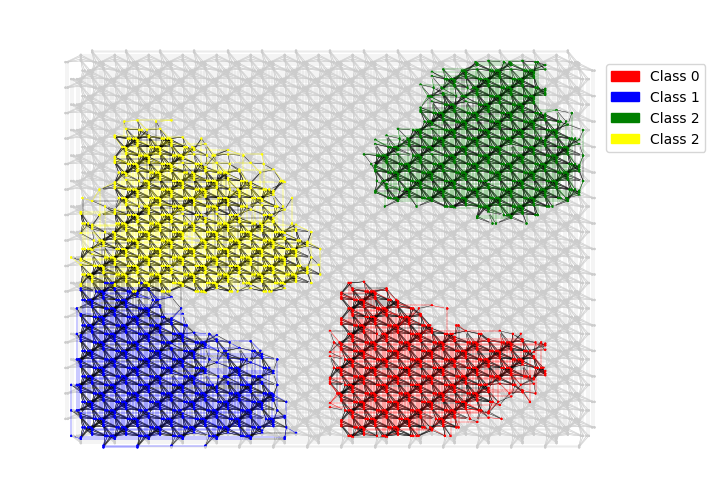

In [24]:
from qsvm import *

params = {
    "data": X_train,
    "label": y_train,
    "B": 2,
    "K": 2,
    "Xi": 1,
    "gamma": gamma,
    "C": 1,
    "kernel": "rbf",
    "optimizer": "MTQA",
    "vis": 1
}

# Initialize and train the classifier
mtqa_OvR = MTQA_OneVsRestClassifier(class_num=nn, classifier=qSVM, params=params)
mtqa_OvR.solve(X_train, y_train)

# Evaluate the classifier
mtqa_accuracy = mtqa_OvR.evaluate(X_test, y_test)
print(f"Test Accuracy: {mtqa_accuracy*100:.2f}%")

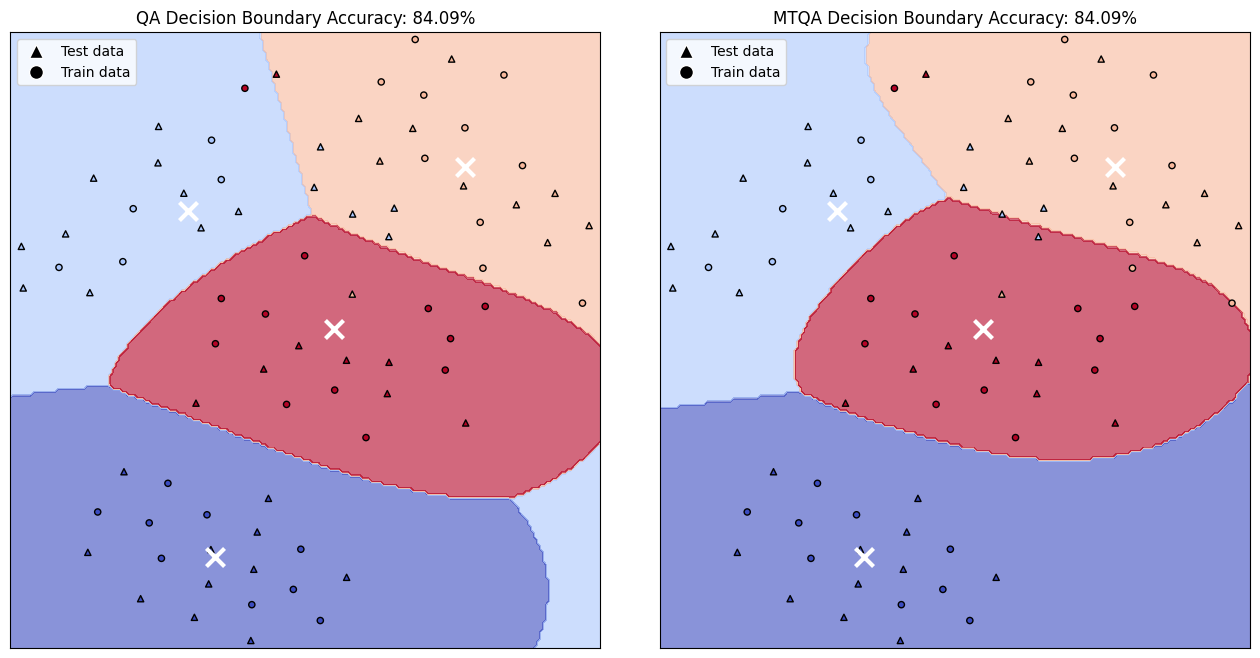

In [21]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def make_meshgrid(x, y, h=.2):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1    
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    return xx, yy

# Function to plot decision boundaries
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# Set up plot figures
fig, sub = plt.subplots(1, 2,figsize=(16, 8))
plt.subplots_adjust(wspace=0.1, hspace=0.4)

# Create meshgrid
X0, X1 = X_tsne[:, 0], X_tsne[:, 1]
xx, yy = make_meshgrid(X0, X1)

# Define colormap for plotting
coolwarm = plt.cm.coolwarm
colors = coolwarm(np.linspace(0, 1, nn))
cm = ListedColormap(colors)
# cm = plt.cm.coolwarm
# cm = plt.cm.Paired

# Plot decision boundaries and data points for qSVM
ax = sub[0]
contour = plot_contours(ax, qa_OvR, xx, yy, cmap=cm, alpha=0.6)
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm, marker='^', edgecolors='k', s=20)
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm, marker='o', edgecolors='k', s=20)

# Compute and plot centroids
centroids = np.array([X_tsne[y_reduced == i].mean(axis=0) for i in np.unique(y_reduced)])
ax.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=169, linewidths=3, color='w', zorder=10)

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(f"QA Decision Boundary Accuracy: {qa_accuracy*100:.2f}%")

# Add labels
labels = ['Test data', 'Train data']
handles = [plt.Line2D([0], [0], marker='^', color='white', markerfacecolor='k', markersize=10, linestyle=''),
           plt.Line2D([0], [0], marker='o', color='white', markerfacecolor='k', markersize=10, linestyle='')]
ax.legend(handles, labels)

# Plot decision boundaries and data points for classical SVM
ax = sub[1]
contour = plot_contours(ax, mtqa_OvR, xx, yy, cmap=cm, alpha=0.6)
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm, marker='^', edgecolors='k', s=20)
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm, marker='o', edgecolors='k', s=20)

# Compute and plot centroids
centroids = np.array([X_tsne[y_reduced == i].mean(axis=0) for i in np.unique(y_reduced)])
ax.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=169, linewidths=3, color='w', zorder=10)

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(f"MTQA Decision Boundary Accuracy: {mtqa_accuracy*100:.2f}%")

# Add labels
labels = ['Test data', 'Train data']
handles = [plt.Line2D([0], [0], marker='^', color='white', markerfacecolor='k', markersize=10, linestyle=''),
           plt.Line2D([0], [0], marker='o', color='white', markerfacecolor='k', markersize=10, linestyle='')]
ax.legend(handles, labels)

# Colorbar
# cbar = fig.colorbar(contour) #, ax=sub.ravel().tolist(), fraction=0.046, pad=0.04
# cbar.set_ticks(np.arange(0, nn))  # Setting ticks for nn classes
# cbar.set_ticklabels(np.arange(0, nn))  # Setting tick labels

plt.savefig("results\digit_0_3_QA_MTQA11.png",  bbox_inches='tight', dpi = 300)

plt.show()

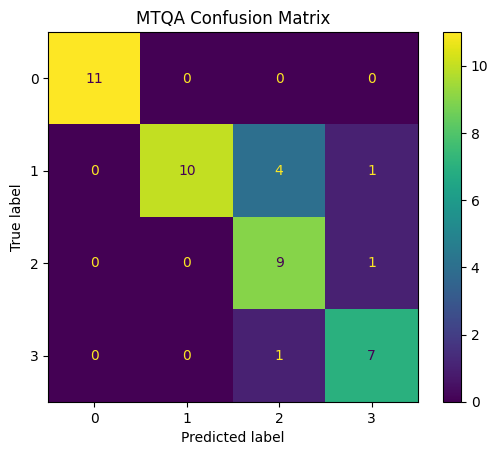

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# First, predict the test set labels
qsvm_predictions = mtqa_OvR.predict(X_test)

# Now, compute the confusion matrix using sklearn's functionality
cm = confusion_matrix(y_test, qsvm_predictions)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_reduced))
disp.plot(values_format='d')  # 'd' for integer formatting
plt.title("MTQA Confusion Matrix")

plt.savefig("results\digit_0_3_mtqa_confusion_matrix.png",  bbox_inches='tight', dpi = 300)

plt.show()


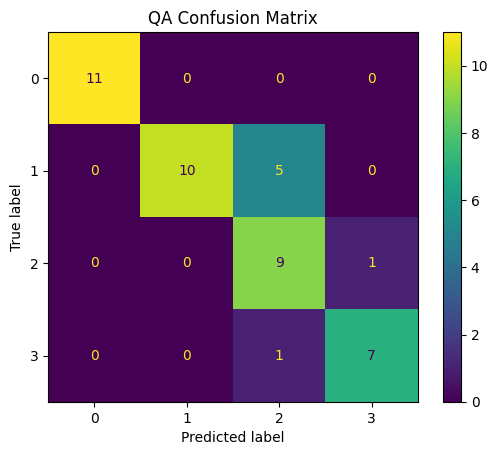

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# First, predict the test set labels
qsvm_predictions = qa_OvR.predict(X_test)

# Now, compute the confusion matrix using sklearn's functionality
cm = confusion_matrix(y_test, qsvm_predictions)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_reduced))
disp.plot(values_format='d')  # 'd' for integer formatting
plt.title("QA Confusion Matrix")

plt.savefig("results\digit_0_3_qa_confusion_matrix.png",  bbox_inches='tight', dpi = 300)

plt.show()
